# Project Description

## Description

### Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# Import Libraries

Import python libraries for EDA, visualization and clustering

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform clustering and compute scoring
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Load Data and Data Overview

In [ ]:
# Loading dataset into dataframe and create working copy of dataframe
file = 'Credit Card Customer Data.xlsx'
data = pd.read_excel(file)
df = data.copy()

In [ ]:
# Size of dataset
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 660 rows and 7 columns


In [ ]:
# Display the first 5 rows of our dataset
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


Notes: 
- SI_No looks to be unique for each customer so that will be dropped from our dataset during feature engineering 

In [ ]:
# Display feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Notes:
- 7 features
- All numerical features
- No missing values

## Data Summary

In [ ]:
# Display 5 point summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


Notes: 
- Unique values for SI_No ranging from 1 to 660
- Customer key ranges from 11265 to 99843
- Average credit limit for customer is a little bit above \\$34,574
- Customers avereage 4 credit cards but 50% have between 3-6 cards
- Cusomters average above 2 personal visits a year 
- Customers average above 2 online logins but there is an outlier of 15 a year
- Customers on average call the bank or its customer service department more than 3 times a year

## Unique Values
This section will look at the unique values of the different features

In [ ]:
# Create list of numerical columns to iterate through
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
# Iterate through columns and display number of unique values
for col in num_cols:
    print(f'Number of unique values for {col}: {df[col].nunique()}')

Number of unique values for Sl_No: 660
Number of unique values for Customer Key: 655
Number of unique values for Avg_Credit_Limit: 110
Number of unique values for Total_Credit_Cards: 10
Number of unique values for Total_visits_bank: 6
Number of unique values for Total_visits_online: 16
Number of unique values for Total_calls_made: 11


Notes: 
- SI_No is confirmed to be unique 
- Customer Key might be unique and another feature I drop later. Need to confirm if we have any missing values or not

In [ ]:
# Removing SI_No from our columns list
num_cols.remove('Sl_No')

## Duplicates

In [ ]:
# Checking dataframe duplicates
df.duplicated().sum()

0

Do not have any duplicates in dataset

## Missing Values

In [ ]:
# Checking dataframe for missing values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

Dataframe does not have any null values. Below I'll look and see what customer keys 

In [ ]:
# Check duplicates for customer key 
df[df['Customer Key'].duplicated(keep=False)].sort_values('Customer Key')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


- There's five different customer keys that have duplicate keys but seeing how these are unique records in themsleves I'll keep the observations but customer key will be dropped in feature engineering

In [ ]:
# removing Customer Key from our column list
num_cols.remove('Customer Key')

# Exploratory Data Analysis
This section will cover exploratory data analysis (univariate and bivariate)

## Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

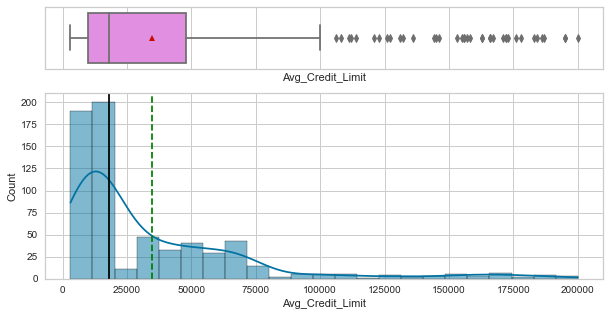

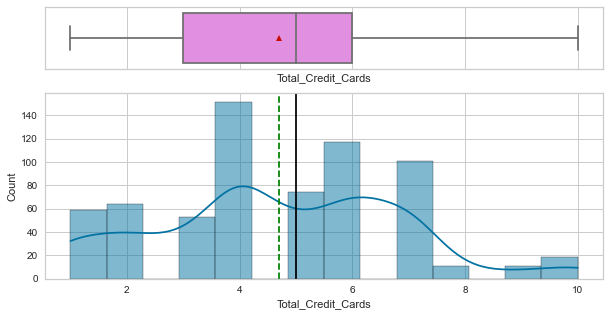

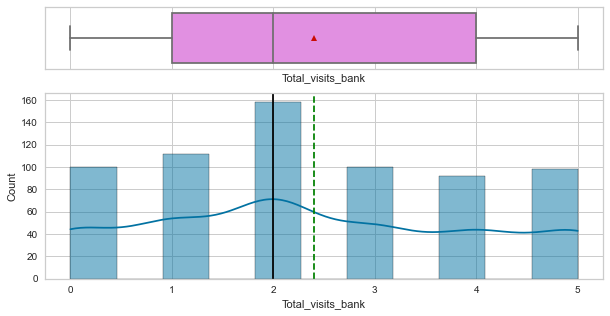

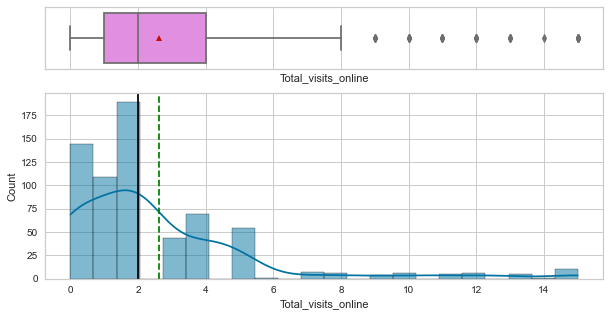

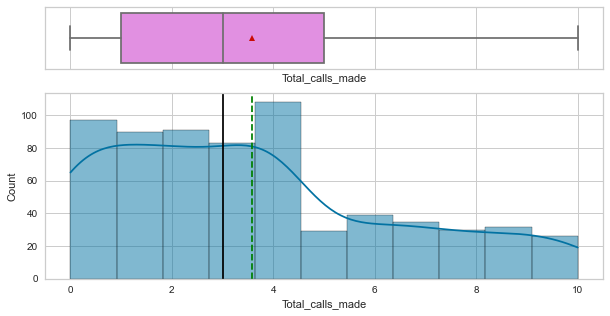

In [ ]:
# Histogram boxplots for our features
for item in num_cols:
    histogram_boxplot(df, item, kde=True, figsize=(10,5))

Notes: 
- Right skewed distribution
- Outliers present on the higher end of the distribution
- Customers have between 4-6 credit cards
- Majority of customers make 2 personal visits to the bank
- 50% of the customers log in online between 1-4 times a year, distribution is also skewed right
- Total calls made is skewed right and majority make 1-5 calls per year

## Bivariate Analysis

In [ ]:
# Calculating feature correlation to be used for the correlation matrix
df_corr = df[num_cols].corr()

In [ ]:
# Create labels to make the Strong, Medium and Weak correlations more clear
# I will define strong correlation as > 0.75
# I will define medium correlation as > 0.50
# I will define weak correlation as > 0.25

labels = np.where(
    np.abs(df_corr) > 0.75, 
    'S', 
    np.where(np.abs(df_corr) > 0.5, 'M', 
            np.where(np.abs(df_corr) > 0.25, 'W', '')),
)

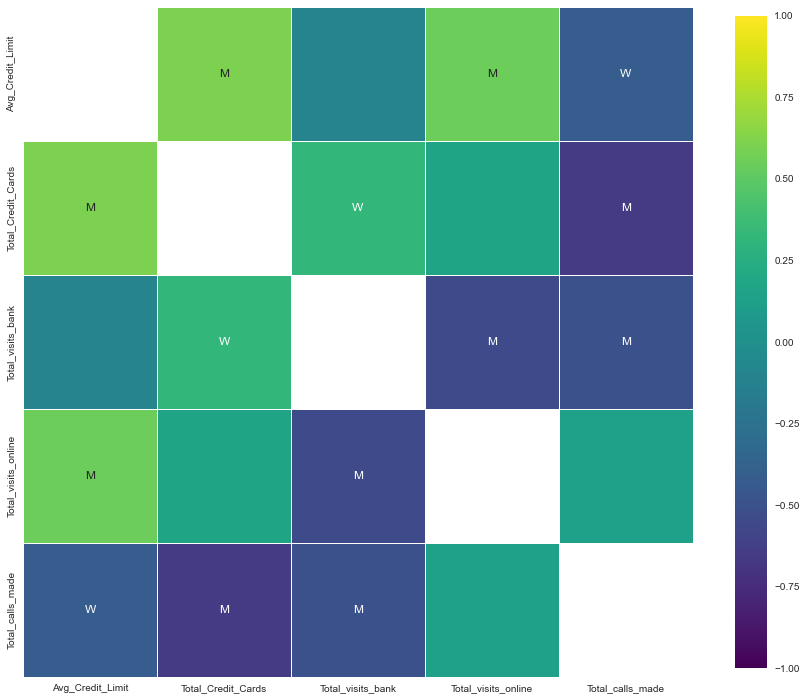

In [ ]:
# Plot correlation matrix with the diagonals masked
plt.figure(figsize=(15,15))
sns.heatmap(
    df_corr, 
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt='',
    linewidths=0.5,
    cmap='viridis',
    cbar_kws={'shrink':0.8},
    vmin=-1, 
    vmax=1
);

Medium Correlation:
- Positive correlation between total credit cards and avg credit limit
- Positive correlation between total online visits and avg credit limit
- Negative correlation between total calls made and total credit cards
- Negative correlation between total online visits and in person bank visits
- Negative correlation between total calls made and in person bank visits

Weak correlation:
- Total calls made and avg credit limit
- Total in person bank visits and total credit cards

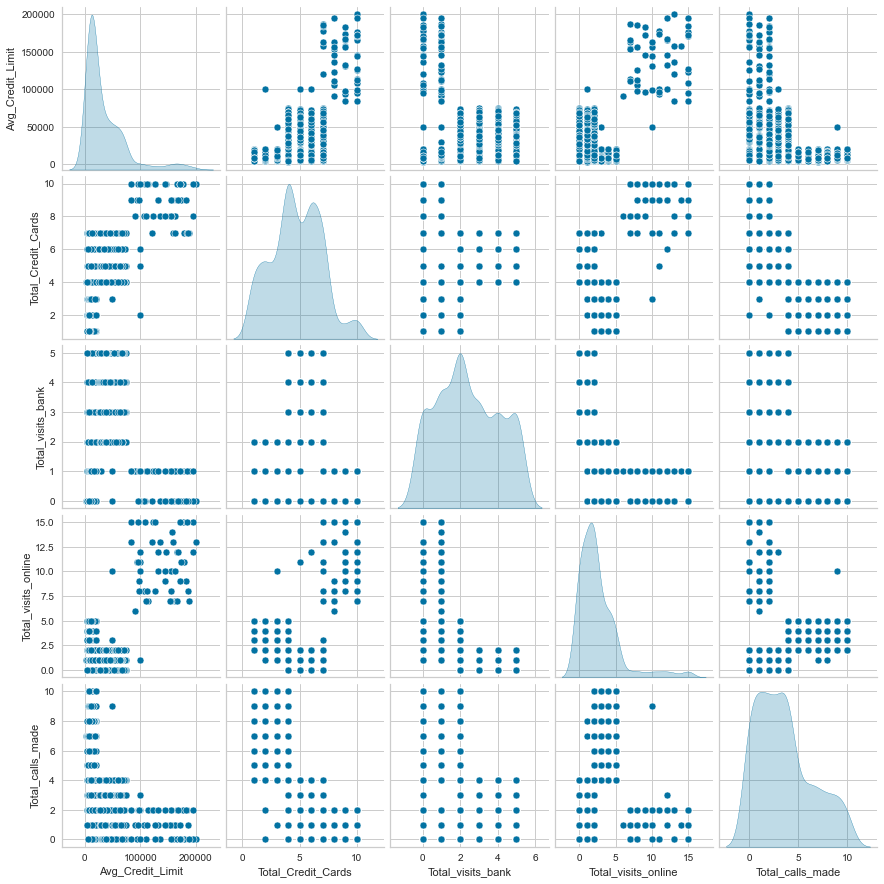

In [ ]:
# Let's take a deeper dive into the feature correlations with pair plots
sns.pairplot(data=df[num_cols], diag_kind='kde');

Notes:
- We can see different clusters for some of the scatter plots
    - Two distinct clusters in total calls made vs total visits online
    - Two distinct clusters in total visits online vs avg credit limit
    - Two distinct clusters in total visits online vs total credit cards
    - Two distinct clusters in total visits online vs total calls made

# Data Preprocessing
This section will cover steps to prepare data for analysis

## Feature Engineering

In [ ]:
# First step for feature engineering will be dropping the two columns identified earlier
df.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)

In [ ]:
# Next we'll scale our features to improve model performance
std_scaler = StandardScaler()

df_scaled = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


## Missing Values

Dataset was already shown to not have any null values so there is no treatment required

No missing values to treat

## Duplicates

Dataset was already shown to not have any duplicates so there is no treatment required

## Outlier Treatment

## Outliers

In [ ]:
# Identifying the percent of outliers in each column of data using IQR following the same approach as the Week 3 EDA lecture nb
# First quartile
Q1 = df[num_cols].quantile(0.25)
# Third quartile
Q3 = df[num_cols].quantile(0.75)

# Compute interquartile range (IQR)
IQR = Q3-Q1

# Compute lower and upper whiskers
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percent of outliers for each feature
((df[num_cols] < lower_whisker) | (df[num_cols] > upper_whisker)).sum()/df.shape[0]*100

Avg_Credit_Limit       5.909091
Total_Credit_Cards     0.000000
Total_visits_bank      0.000000
Total_visits_online    5.606061
Total_calls_made       0.000000
dtype: float64

Looks like we have two features that have more than 5% outliers. I want to keep these as is because the outliers as we saw in the univariate are not unrealistic for these features. I also want to see how these outliers cluster in our analysis and see if there is a small cluster from these groups that identifies an opportunity or area of concern for the bank

# K-Means Clustering 

This section will:
- Apply K-means clustering
- Plot the Elbow curve
- Check Silhouette Scores
- Determine optimal number of clusters
- Apply cluster profiling

In [ ]:
# Find optimal no of clusters by calculating mean distortion for a range of clusters and finding the elbow of our curve
# Set number of clusters to be from 1-9
clusters = range(1,10)

# Create empty list for our mean distortions 
meanDistortions = []

for k in clusters: 
    model = KMeans(n_clusters=k)            # Initialize KMeans model
    model.fit(df_scaled)                    # Fit model on our scaled data
    prediction = model.predict(df_scaled)   # Predict the model on the data
    
    # Find Distortion
    distortion = (
     sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0]
    )
    
    # Append Distortion value to list
    meanDistortions.append(distortion)

In [ ]:
# Plot Elbow Curve (mean distortions vs number of clusters)
#fig = px.line(x=clusters, y=meanDistortions, text=[round(x,2) for x in meanDistortions])
#fig.update_layout(title='KMeans Elbow Plot', xaxis_title='Number of Clusters', yaxis_title='Average Distortion')
#fig.show()

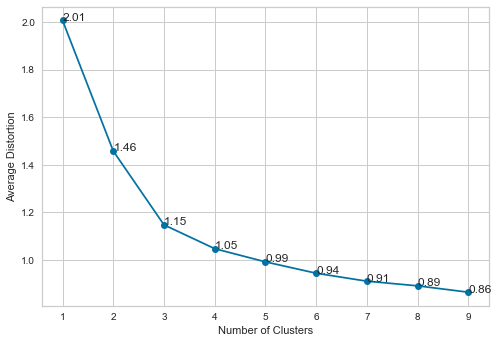

In [ ]:
# Plot Elbow Curve (mean distortion vs number of clusters)
plt.plot(clusters, meanDistortions, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distortion')

for a,b in zip(clusters, meanDistortions): 
    plt.text(a, b, str(round(b,2)))
plt.show()

From the Elbow Plot, we can see an elbow at 3 clusters. To verify, I'll evaluate the quality of clusters via the silhouette score

## Silhouette Score
This section will evalute the quality of clusters through the silhouette score method. This method measures how similar an object is to it's own cluster compared to others and ranges from -1 to 1. The following criteria will be used to evaluate the clusters:
1. Silhouette score near 1 means the sample is far from the neighboring clusters
2. Silhouette score near -1 means the sample might have been assigned to the wrong cluster
3. Silhouette score near 0 means clusters are not well separable 

In [ ]:
# Create empty list for silhouette score
s_score = []

# Loop through # of clusters from 2-9 and calculate silhouette score
for k in range(2,10):
    # Initialize KMeans model
    model = KMeans(n_clusters=k)
    # Fit and predict on scaled data
    prediction = model.fit_predict(df_scaled)
    # Calculate silhouette score
    score = silhouette_score(df_scaled, prediction)
    # Append score to list
    s_score.append(score)

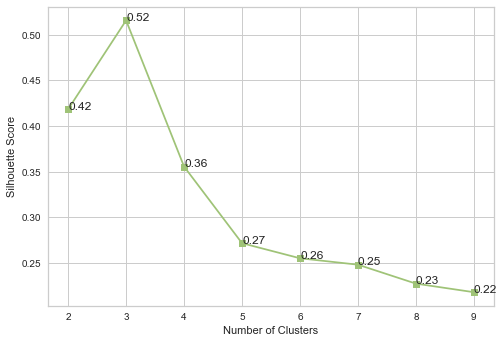

In [ ]:
# Plot Silhouette Score vs Number of clusters
#fig = px.line(x=range(2,10), y=s_score, text=[round(x,2) for x in s_score])
#fig.update_layout(title='Silhouette Scores', xaxis_title='Number of Clusters', yaxis_title='Silhouette Score')
#fig.show()

plt.plot(range(2,10), s_score, 'gs-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

for a,b in zip(range(2,10), s_score): 
    plt.text(a, b, str(round(b,2)))
plt.show()

From the silhoutte plot we can see that 3 would be a good number of clusters for our dataset. We can get a deeper investigation using SilhouetteVisualizer. Below I'll look at the Silhouette visuals for 2,3 and 4 clusters. From our notes, we obatined the following list of criteria every cluster needs to satisfy for selecting the optimal number of clusters

1. There shall be no negative silhouette coefficient value
2. All clusters should cross the average silhouette score 
3. All clusters should have different variations (width)
4. All clusters should have different silhouette scores

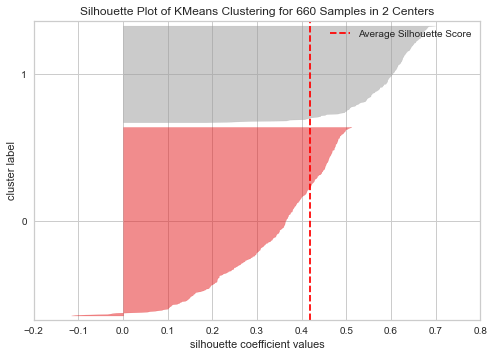

In [ ]:
# Plotting Silhouette Plot for 2 clusters
fig = SilhouetteVisualizer(KMeans(2, random_state=1))
fig.fit(df_scaled)
fig.show();

With two clusters, we meet the last three criteria but we do not meet the first

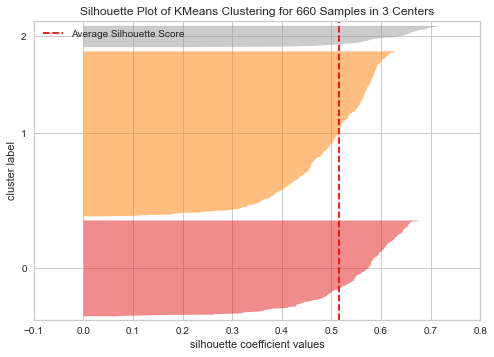

In [ ]:
# Plotting Silhouette Plot for 3 clusters
fig = SilhouetteVisualizer(KMeans(3, random_state=1))
fig.fit(df_scaled)
fig.show();

For three clusters, we meet all four selection criteria

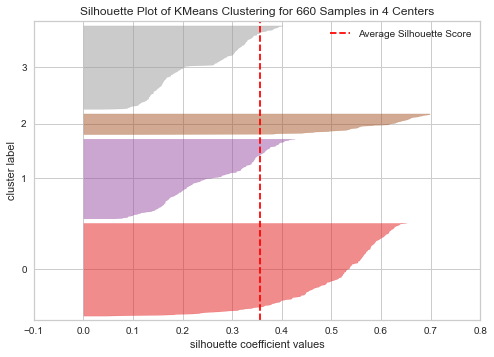

In [ ]:
# Plotting Silhouette Plot for 4 clusters
fig = SilhouetteVisualizer(KMeans(4, random_state=1))
fig.fit(df_scaled)
fig.show();

We can see for 4 clusters we have some clusters with same widths so this would not be an appropriate selection. Based off the three plots we can see that 3 clusters is the optimal number

## Cluster Profiling
This section will apply KMeans clustering for 3 clusters and segment our dataset appropriately 

In [ ]:
# Initialize KMeans model for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)
# Fit on scaled dataset
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=1)

In [ ]:
# add cluster label to dataset
df['Cluster'] = kmeans.labels_

In [ ]:
# Cluster profile 
profile = df.groupby('Cluster').mean()

# Add value counts (using avg credit limit arbitrarily since there should be the same count of each feature time for a given cluster)
profile['Count_in_each_segment'] = df.groupby('Cluster')['Avg_Credit_Limit'].count().values

In [ ]:
# Display profile and highlight max value for each column
table1 = profile.style.highlight_max(color='lightgreen',axis=0)
table1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_segment
Cluster,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


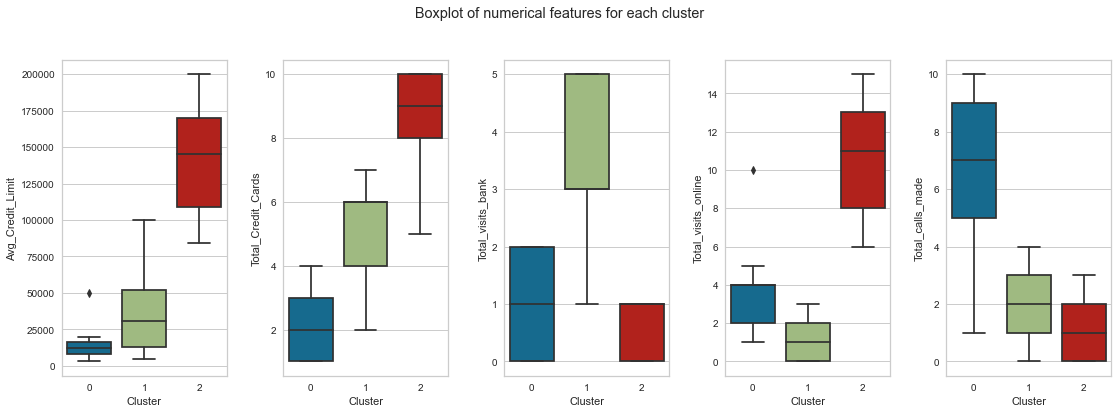

In [ ]:
# Boxplot of each feature 
fig, axes = plt.subplots(1,5, figsize=(16,6))
fig.suptitle('Boxplot of numerical features for each cluster')
counter = 0
for i in range(5):
    sns.boxplot(
        ax=axes[i], 
        y=df[num_cols[counter]], 
        x=df['Cluster']
    )
    counter += 1

fig.tight_layout(pad=2.0)

## Cluster Profiling Summary

From the cluster profiling, we can see the following relative characteristics of each cluster:

- **Cluster 0**:
    - Average credit limit is low
    - Low number of credit cards (1-4)
    - Moderate visits to the bank in person per year (0-2)
    - Moderate online log ins per year 
    - High number of calls made to the bank or service center
    
- **Cluster 1**:
    - Average credit limit is moderate
    - Moderage number of credit cards (2-7)
    - High number of visits to the bank in person per year (3-4)
    - Low online log ins per year
    - Moderate number of calls made to the bank or service center

- **Cluster 2**:
    - Average credit limit is high
    - High number of credit cards (5-10)
    - Low number of in person visits to the bank per year (0-1)
    - High online log ins per year
    - Low number of calls made to the bank or service center

# Hierarchical Clustering 

This section will: 
- Apply Hierarchical clustering with different linkage methods 
- Plot dendrograms for each linkage method 
- Check cophenetic correlation for each linkage method 
- Figure out appropriate number of clusters 
- Cluster Profiling

In [ ]:
# Determining the cophenetic correlation for each linkage method
# Distance metrics to evaluate
distance = ['euclidean','chebyshev','mahalanobis','cityblock', 'minkowski']

# Linkage methods to evaluate
link_methods = ['single', 'complete', 'average', 'weighted']

# Initializing variables for highest cophenetic correlation and method
high_cophenet_corr = 0
high_dm_lm = [0,0]

for dis in distance:
    for link in link_methods:
        Z = linkage(df_scaled, metric=dis, method=link)
        c, coph_dists = cophenet(Z, pdist(df_scaled))
        print(
            f'Cophenetic correlation for {dis.capitalize()} distance and {link} linkage is {c}'
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm =[dis, link]

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042134
Cophenetic correlation f

In [ ]:
# Print the combination of distance metric and linkage method with the highest cophentic correlation
print(
    'Highest cophenetic correlation is {}, which is obatined with {} distance and {} linkage'.format(
        high_cophenet_corr, high_dm_lm[0], high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obatined with euclidean distance and average linkage


In [ ]:
# Repeating process above for euclidean distance and centroid and ward linkage methods (only applicalbe for eucl. distance method so could not include above)
link_methods = ['centroid', 'ward']

for lm in link_methods:
    Z = linkage(df_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm = ['euclidean',lm]

Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.


In [ ]:
# Print the combination of distance metric and linkage method with the highest cophentic correlation to verify eye check
# that euclidean with average linkage gives us the best results
print(
    'Highest cophenetic correlation is {}, which is obatined with {} distance and {} linkage'.format(
        high_cophenet_corr, high_dm_lm[0], high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obatined with euclidean distance and average linkage


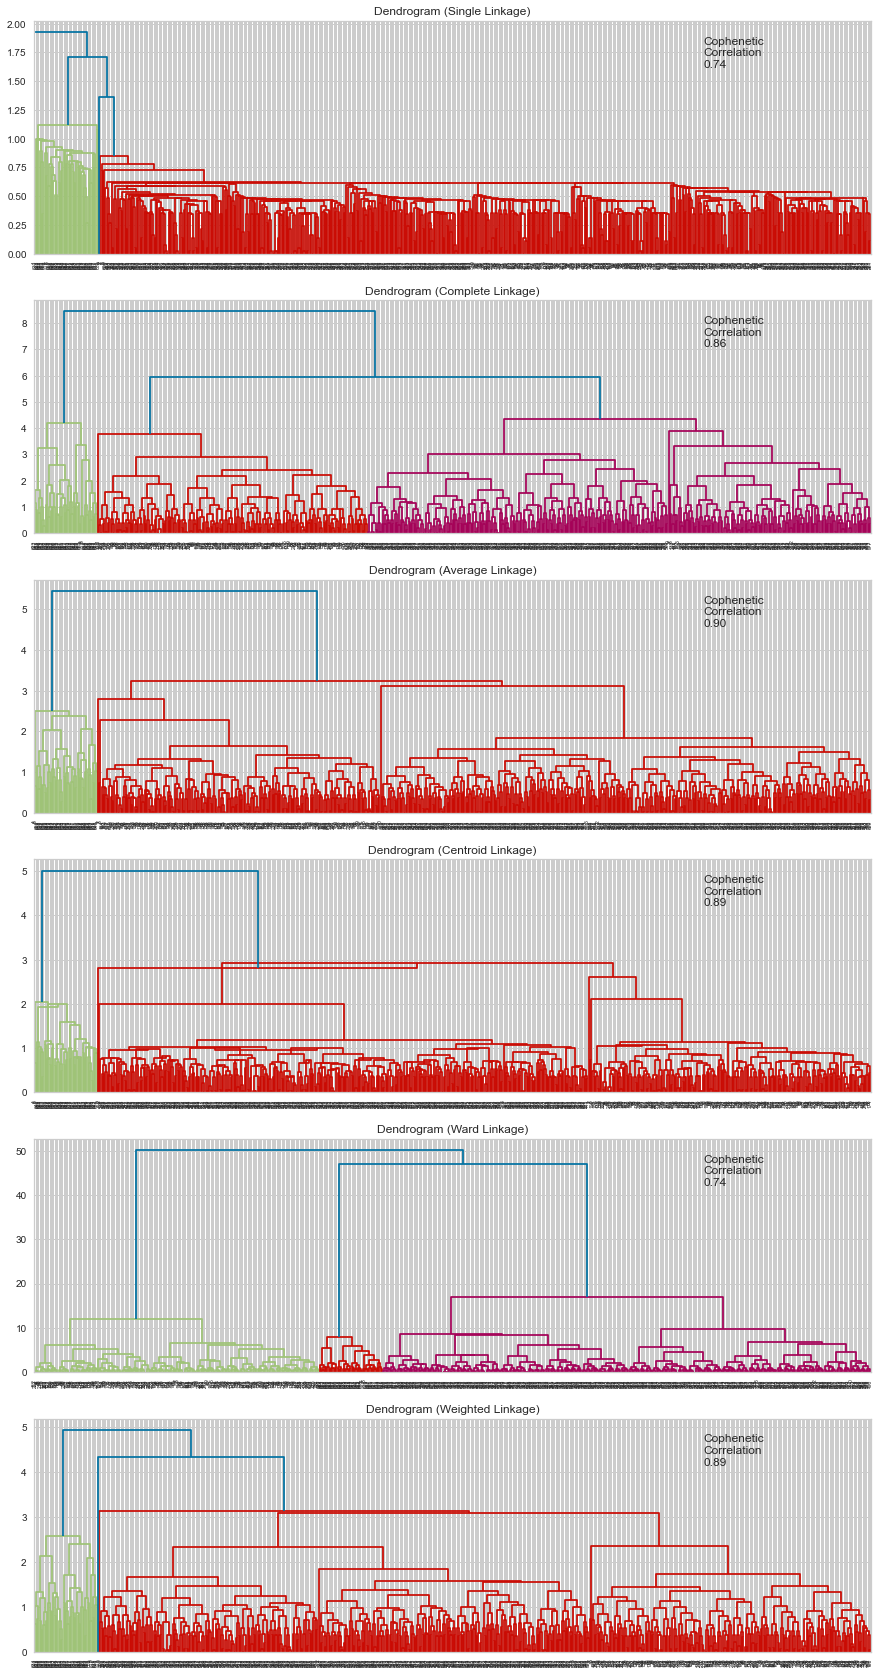

In [ ]:
# Plot dendograms for each linkage methods using euclidean distances 
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Notes:
- The cophenetic correlation is highest for average and centroid
- I will move ahead with average linkage
- 3 Seems to be the appropriate number of clusters from the average linkage dendogram (visualization for cut below)

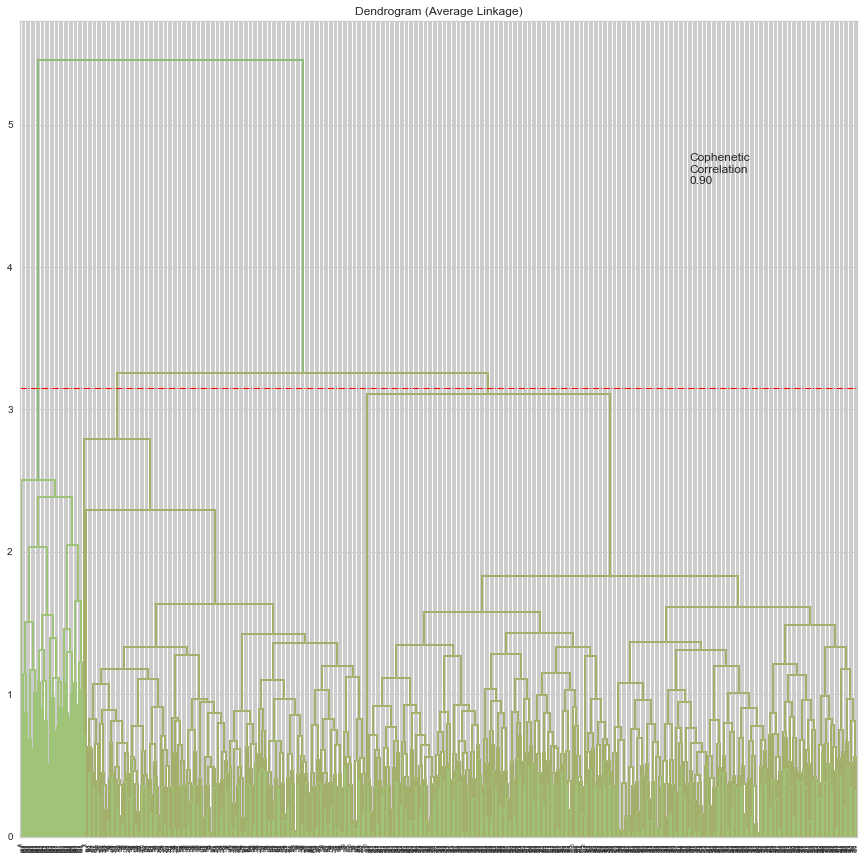

In [ ]:
# Visualize cut on dendogram for average link 
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=3.15, c="red", lw=1, linestyle="dashdot")

## Cluster Profiling

In [ ]:
# Initialize model with selected parameters
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
# Fit model on dataset
HCmodel.fit(df_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
# Add column for the clusters obtain form our HCmodel in our original database
df['HC_Clusters'] = HCmodel.labels_

In [ ]:
# Group by the HC clusters
HC_profile = df.groupby('HC_Clusters').mean()

# Add value counts (using avg credit limit arbitrarily since there should be the same count of each feature time for a given cluster)
HC_profile['Count_in_each_segment'] = df.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [ ]:
# Display profile and highlight max value for each column
table2 = HC_profile.drop('Cluster',axis=1).style.highlight_max(color='lightgreen',axis=0)
table2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_segment
HC_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


In [ ]:
# Silhouette score
# Fit and predict on scaled data
prediction = HCmodel.fit_predict(df_scaled)
# Calculate silhouette score
score = silhouette_score(df_scaled, prediction)
score

0.5159224326511334

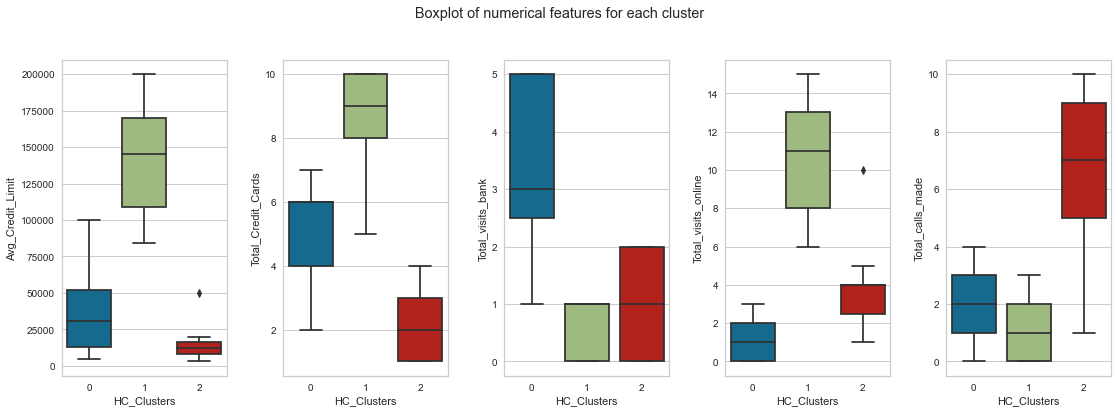

In [ ]:
# Boxplot of each feature 
fig, axes = plt.subplots(1,5, figsize=(16,6))
fig.suptitle('Boxplot of numerical features for each cluster')
counter = 0
for i in range(5):
    sns.boxplot(
        ax=axes[i], 
        y=df[num_cols[counter]], 
        x=df['HC_Clusters']
    )
    counter += 1

fig.tight_layout(pad=2.0)

## Cluster Profile Summary 
This section will summarize the characterize the clusters determined by our hierarchical model.

Cluster 0:
- Moderate Credit Limit
- Moderate number of credit cards (4-6)
- High number of in person bank visits per year
- Low number of online logins per year
- Moderate amount of calls made to the bank or service center

Cluster 1:
- High credit limit
- High number of credit cards (8-10)
- Low number of in person bank visits per year
- High number of online log ins per year
- Low number of calls made to the bank or service center

Cluster 2:
- Low credit limit
- Low number of credit card
- Moderate number of in person visits to the bank per year
- Moderate number of online log ins per year
- High number of calls made to the bank or service center

## KMeans vs Heirarchical Clustering
This section will compare the clusters we obtain from the two different approaches

Below I'll print the two tables we created earlier to compare the averages of the two sets of clusters

In [ ]:
table1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_segment
Cluster,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [ ]:
table2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Count_in_each_segment
HC_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


Summary: 
- Both methods produced the same cluster results when it comes to average characteristice for each features
- Cluster numbering was different but the counts align with the characteristics so we end up getting the same grouping results
- We also notice that both approaches get us the same silhouette score for 3 clusters (0.52)
- For our application, I would prefer to go with HC since our dataset was small so it was a bit quicker to determine the optimal number of clusters 
- Further comparision on pairwise plots included in Appendix below showing same clustering with both approaches

# Actionable Insights & Recommendations

**Insights:**

Since I elected to go with the HC model, below are the insights I gathered for the individual clusters:

Cluster 0:
- Moderate Credit Limit
- Moderate number of credit cards (4-6)
- High number of in person bank visits per year
- Low number of online logins per year
- Moderate amount of calls made to the bank or service center

Cluster 1:
- High credit limit
- High number of credit cards (8-10)
- Low number of in person bank visits per year
- High number of online log ins per year
- Low number of calls made to the bank or service center

Cluster 2:
- Low credit limit
- Low number of credit card
- Moderate number of in person visits to the bank per year
- Moderate number of online log ins per year
- High number of calls made to the bank or service center

Business Recommendations: 
- Upsell to Cluster 0. They tend to have a moderate profile wrt to majority of the characteristics so the bank could target them with higher-end credit cards and services to capitalize on the opportunity
- Target new customers from Cluster 2 since they tend to have a low number of credit cards. They also have lower credit limits so this would be a good opportunity to sell them on some of the lower end credit cards similar to the Discover It card. They also tend to have a high number of calls made to the service center so AllLife Bank can market the new service delivery model 
- Cluster 1 seems like a good group to cross-sell any services that may compliment their current products/cards
- The number of annual online log ins seemed low for each group. This could be an area the bank improves by adding capabilities to their mobile app and online sites

# Appendix

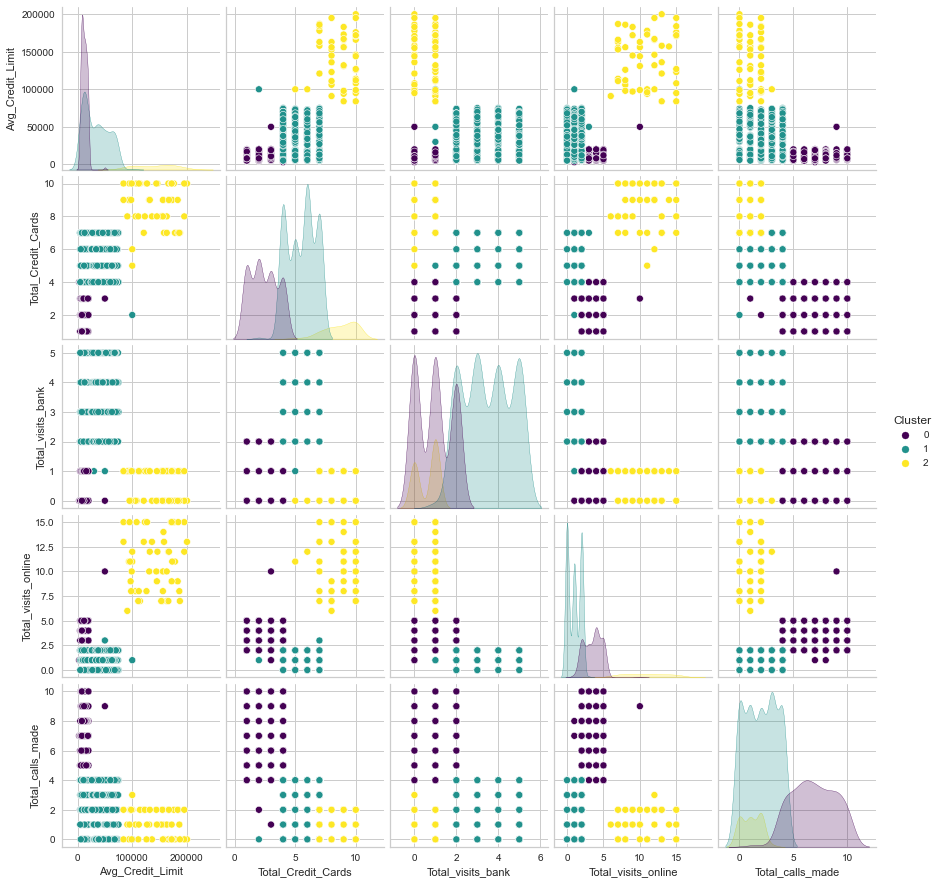

In [ ]:
# Pairplot with the KMeans Clustering segmentation
sns.pairplot(data=df.drop('HC_Clusters',axis=1),hue='Cluster', diag_kind='kde', palette='viridis');

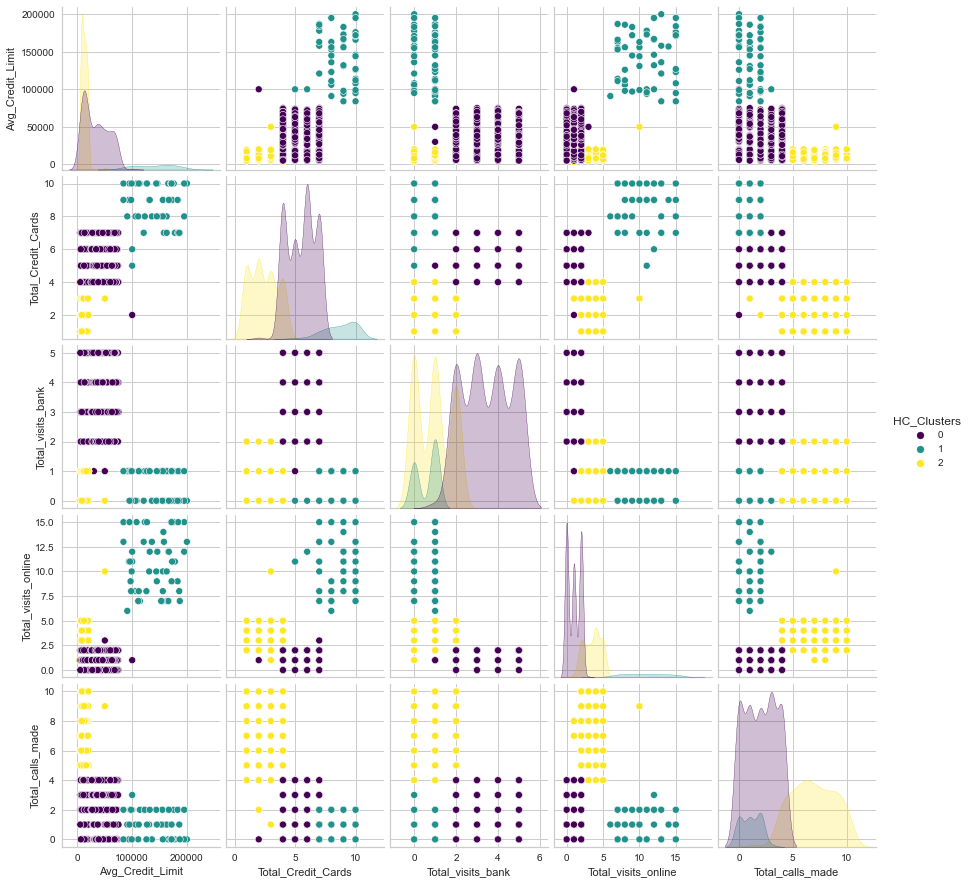

In [ ]:
# Pairplot with HC 
sns.pairplot(data=df.drop('Cluster',axis=1),hue='HC_Clusters', diag_kind='kde', palette='viridis');